In [1]:
import sys; sys.path.append('..')
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mplppt import ppt

(-0.6, 1.2)

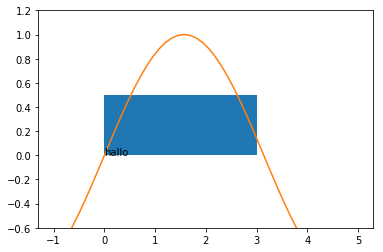

In [2]:
fig, ax = plt.subplots()

ax.add_patch(
  mpl.patches.Rectangle(
  (0, 0),   # (x,y)
  3,          # width
  0.5,        # height
  )
)

x = np.linspace(-1,5)
y = np.sin(x)
line, = plt.plot(x,y,color='C1')
plt.plot([1,2],[-1.2,-1.5])

text = plt.gca().text(0,0,'hallo')
text._verticalalignment = 'baseline'
plt.ylim(-.6,1.2)

In [3]:
text._horizontalalignment

'left'

In [4]:
text._verticalalignment

'baseline'

# Create ppt

In [5]:
p = ppt.Group(objects=[])

# Rectangles

In [6]:
rects = [rect for rect in plt.findobj(fig, mpl.patches.Rectangle) if rect.axes is not None]
for rect in rects:
  p = p + ppt.Rectangle.from_mpl(rect)

# Lines

In [7]:
lines = [line for line in plt.findobj(fig, mpl.lines.Line2D) if line.axes is not None]
for line in lines:
  p = p + ppt.Shape.from_mpl(line)

# Text

In [8]:
texts = [text for text in plt.findobj(fig, mpl.text.Text) if (text.axes is not None and text._text != '')]
for i, text in enumerate(texts):
  text.axes = ax
  p = p + ppt.Text.from_mpl(text)
  print(text._x, text._y)

0 0


# Canvas

In [9]:
p = p + ppt.Canvas.from_mpl(ax)

# Save

In [10]:
p.save('test.pptx')